<a href="https://colab.research.google.com/github/arjunparmar/VIRTUON/blob/main/Rupanshu/seg_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!cp -r drive/Shareddrives/Virtuon/Machine\ Learning\ Project/Pre_Trained_Model/* /content

In [7]:
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2 as cv
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

from tensorflow.keras.utils import plot_model

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Sequential, Model

import matplotlib.pyplot as plt
%matplotlib inline



In [8]:
from model import build_model

In [9]:
def preprocessing(image, label):
    image_string = tf.io.read_file(image)
 
    #Don't use tf.image.decode_image, or the output shape will be undefined
    image = tf.io.decode_jpeg(image_string, channels=3)
 
    #This will convert to float values in [0, 1]
    image = tf.image.convert_image_dtype(image, tf.uint8)

    resized_image = tf.image.resize(image, [im_height, im_height])
    
    #resized_image = tf.image.convert_image_dtype(resized_image, tf.uint8)
    
    image_string = tf.io.read_file(label)
 
    #Don't use tf.image.decode_image, or the output shape will be undefined
    image = tf.io.decode_png(image_string, channels = 1)
    
    image = tf.reduce_sum(image, axis = -1)
    
    image = tf.one_hot(image, depth = n_class)
    
    resized_label_image = tf.image.resize(image, [im_height, im_height])
    
    return resized_image, resized_label_image

In [10]:
seg_net = build_model()

In [12]:
seg_net.load_weights("model.11-0.8409.hdf5")

In [13]:
im_height, im_width, im_channels = (320,320,3)
n_classes = 20
common_interpolation = 'bilinear'

In [14]:
def random_choice(image_size):
    height, width = image_size
    crop_height, crop_width = 320, 320
    x = random.randint(0, max(0, width - crop_width))
    y = random.randint(0, max(0, height - crop_height))
    return x, y
    
def safe_crop(mat, x, y):
    crop_height, crop_width = im_height, im_width
    if len(mat.shape) == 2:
        ret = np.zeros((crop_height, crop_width), np.float32)
    else:
        ret = np.zeros((crop_height, crop_width, 3), np.float32)
    crop = mat[y:y + crop_height, x:x + crop_width]
    h, w = crop.shape[:2]
    ret[0:h, 0:w] = crop
    return ret

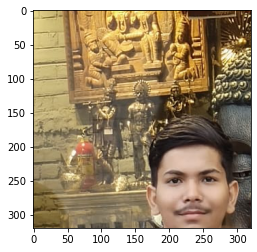

In [28]:
test_path1 = "/content/drive/MyDrive/WhatsApp Image 2021-01-02 at 3.35.47 PM.jpeg"
test1 = img_to_array(load_img(test_path1))
x,y = random_choice(test1.shape[:2])
plt.imshow(safe_crop(test1, x, y)/255)

In [35]:
test_path2 = "/content/drive/MyDrive/0012.jpg"
test2 = img_to_array(load_img(test_path1))

In [54]:
test_path3 = "/content/drive/MyDrive/0010.jpg"
test3 = img_to_array(load_img(test_path3))

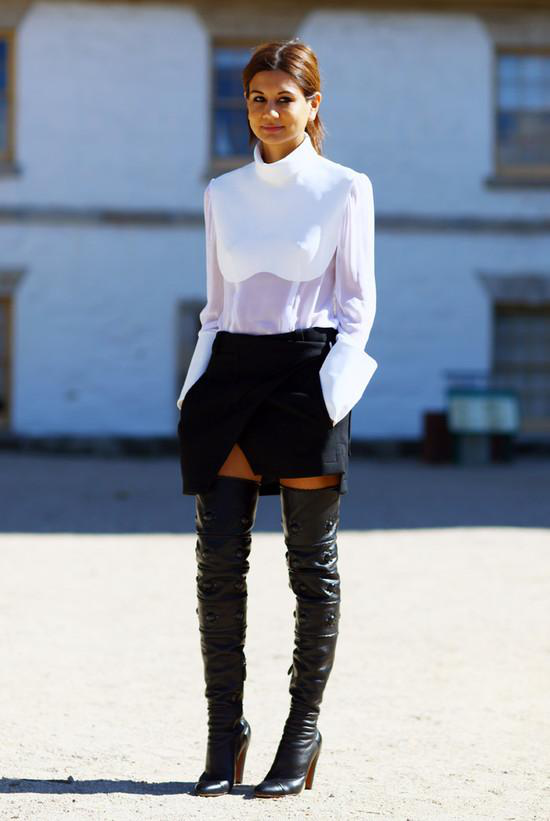

In [37]:
load_img("/content/drive/MyDrive/0012.jpg")

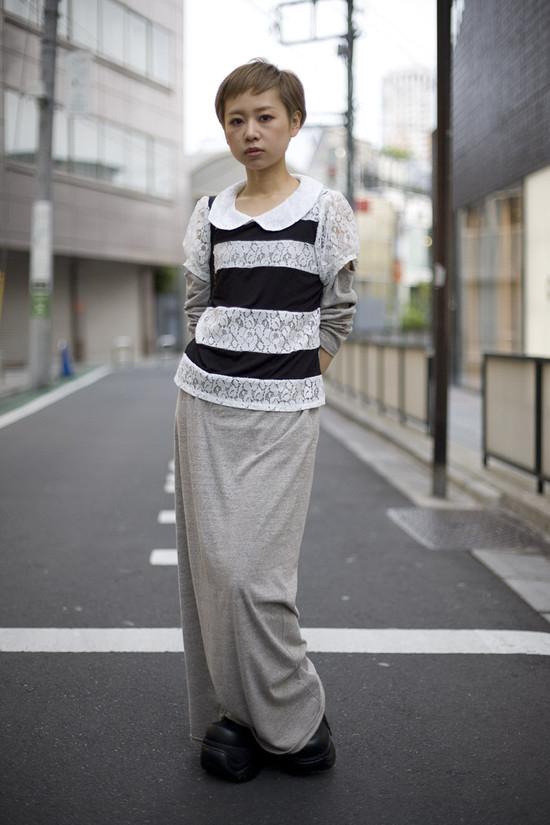

In [47]:
load_img("/content/drive/MyDrive/0010.jpg")

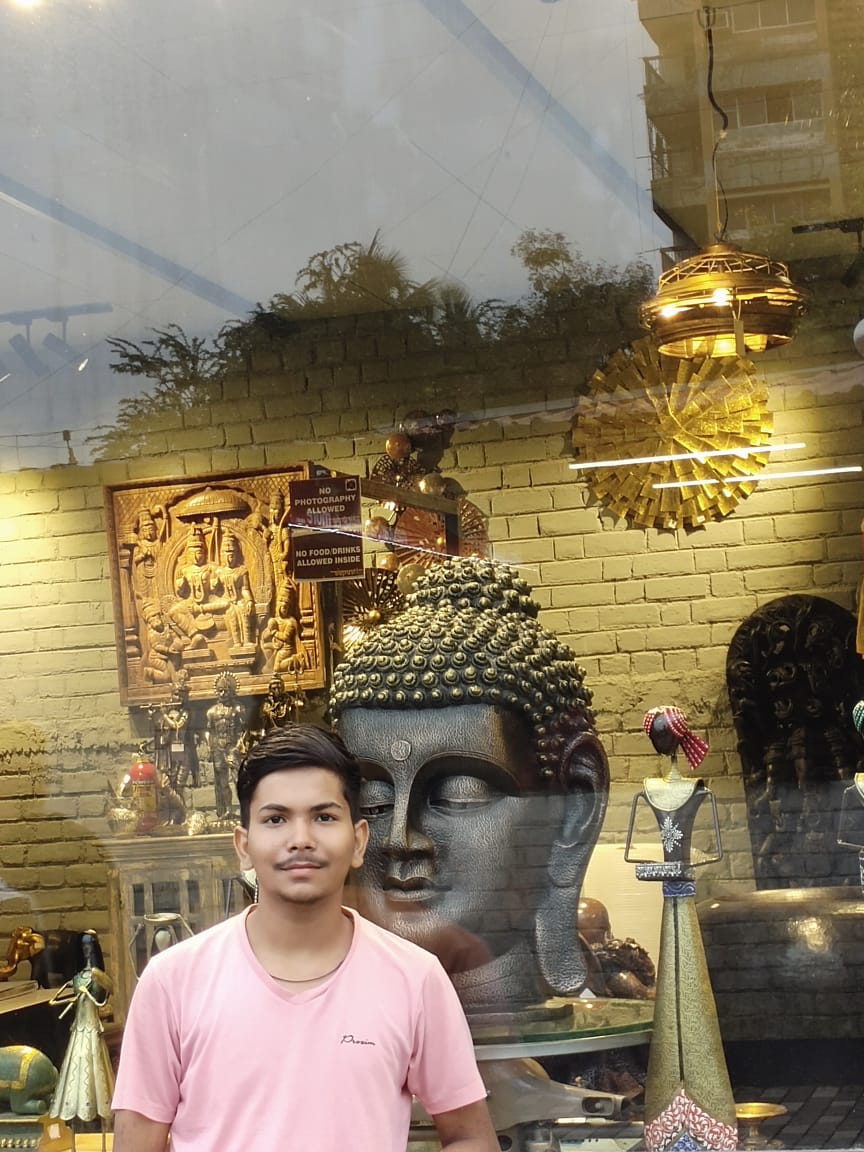

In [29]:
load_img("/content/drive/MyDrive/WhatsApp Image 2021-01-02 at 3.35.47 PM.jpeg")

In [33]:
def image(path1):
    return img_to_array(load_img(path1, target_size=(im_height, im_width), interpolation = common_interpolation))


def segnet_output(path1):
    output = seg_net.predict(image(path1).reshape( (1, im_height, im_width, im_channels) )/255.0)
    output = output.reshape((im_height, im_width, n_classes))
    return output

In [40]:
def image(path2):
    return img_to_array(load_img(path2, target_size=(im_height, im_width), interpolation = common_interpolation))


def segnet_output(path2):
    output = seg_net.predict(image(path2).reshape( (1, im_height, im_width, im_channels) )/255.0)
    output = output.reshape((im_height, im_width, n_classes))
    return output

In [55]:
def image(path3):
    return img_to_array(load_img(path3, target_size=(im_height, im_width), interpolation = common_interpolation))


def segnet_output(path3):
    output = seg_net.predict(image(path3).reshape( (1, im_height, im_width, im_channels) )/255.0)
    output = output.reshape((im_height, im_width, n_classes))
    return output

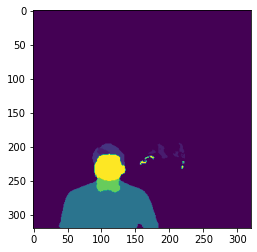

In [34]:
plt.imshow(tf.math.argmax(segnet_output(test_path1), axis = -1))

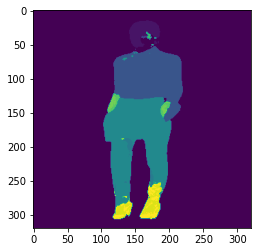

In [41]:
plt.imshow(tf.math.argmax(segnet_output(test_path2), axis = -1))

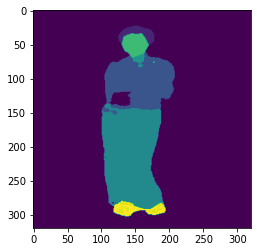

In [56]:
plt.imshow(tf.math.argmax(segnet_output(test_path3), axis = -1))